<a href="https://colab.research.google.com/github/yy51/machine-learning/blob/master/adam_vs_sgd_3(cifar10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###TensorFlowのインポート

In [ ]:
!pip install tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

     |████████████████████████████████| 380.5MB 46kB/s 
     |████████████████████████████████| 4.3MB 17.0MB/s 
     |████████████████████████████████| 501kB 28.6MB/s 


###データセットのダウンロードと準備

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

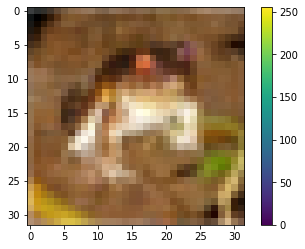

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
print(train_labels)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

# ピクセルの値を 0~1 の間に正規化
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
print(n_labels)
print(test_labels_onehot)
print(test_labels)

10
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [ ]:
print(test_labels.T[0])

[3 8 8 ... 5 1 7]


In [ ]:
from keras.utils import to_categorical

Y_train = to_categorical(test_labels.T[0], 10)
print(Y_train)

Using TensorFlow backend.


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
n_labels = len(np.unique(train_labels))
train_labels_tmp = train_labels.T[0]
train_labels_onehot = np.eye(n_labels)[train_labels_tmp]

n_labels = len(np.unique(test_labels))
test_labels_tmp = test_labels.T[0]
test_labels_onehot = np.eye(n_labels)[test_labels_tmp]

In [ ]:
print(n_labels)
print(train_labels_onehot)

10
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


### モデル作成

In [ ]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [ ]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))

In [ ]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.Flatten())
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(10, activation='softmax'))

###モデルのコンパイルと学習

In [ ]:
model1.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

sgd_scc = model1.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 13s 255us/sample - loss: 2.0504 - accuracy: 0.2433 - val_loss: 1.9663 - val_accuracy: 0.2912
Epoch 2/30
50000/50000 [==============================] - 12s 245us/sample - loss: 1.7127 - accuracy: 0.3806 - val_loss: 1.9680 - val_accuracy: 0.3109
Epoch 3/30
50000/50000 [==============================] - 12s 246us/sample - loss: 1.5130 - accuracy: 0.4521 - val_loss: 1.4668 - val_accuracy: 0.4710
Epoch 4/30
50000/50000 [==============================] - 12s 246us/sample - loss: 1.3928 - accuracy: 0.4992 - val_loss: 1.4009 - val_accuracy: 0.4937
Epoch 5/30
50000/50000 [==============================] - 12s 244us/sample - loss: 1.3020 - accuracy: 0.5363 - val_loss: 1.2673 - val_accuracy: 0.5490
Epoch 6/30
50000/50000 [==============================] - 12s 247us/sample - loss: 1.2260 - accuracy: 0.5638 - val_loss: 1.2934 - val_accuracy: 0.5442
Epoch 7/30
50000/50000 [====================

In [ ]:
model2.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

sgd_mse = model2.fit(train_images, train_labels_onehot, epochs=100, validation_data=(test_images, test_labels_onehot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 14s 272us/sample - loss: 0.0901 - accuracy: 0.1016 - val_loss: 0.0900 - val_accuracy: 0.1005
Epoch 2/100
50000/50000 [==============================] - 13s 252us/sample - loss: 0.0900 - accuracy: 0.1091 - val_loss: 0.0899 - val_accuracy: 0.1115
Epoch 3/100
50000/50000 [==============================] - 13s 253us/sample - loss: 0.0899 - accuracy: 0.1210 - val_loss: 0.0899 - val_accuracy: 0.1339
Epoch 4/100
50000/50000 [==============================] - 13s 255us/sample - loss: 0.0899 - accuracy: 0.1442 - val_loss: 0.0898 - val_accuracy: 0.1584
Epoch 5/100
50000/50000 [==============================] - 13s 256us/sample - loss: 0.0898 - accuracy: 0.1675 - val_loss: 0.0898 - val_accuracy: 0.1806
Epoch 6/100
50000/50000 [==============================] - 13s 256us/sample - loss: 0.0898 - accuracy: 0.1869 - val_loss: 0.0897 - val_accuracy: 0.1925
Epoch 7/100
50000/50000 [=============

In [ ]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

adam_scc = model3.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 14s 273us/sample - loss: 1.5344 - accuracy: 0.4394 - val_loss: 1.2417 - val_accuracy: 0.5586
Epoch 2/20
50000/50000 [==============================] - 13s 261us/sample - loss: 1.1723 - accuracy: 0.5852 - val_loss: 1.0784 - val_accuracy: 0.6193
Epoch 3/20
50000/50000 [==============================] - 13s 259us/sample - loss: 1.0208 - accuracy: 0.6417 - val_loss: 1.0222 - val_accuracy: 0.6420
Epoch 4/20
50000/50000 [==============================] - 13s 261us/sample - loss: 0.9243 - accuracy: 0.6736 - val_loss: 0.9678 - val_accuracy: 0.6553
Epoch 5/20
50000/50000 [==============================] - 13s 262us/sample - loss: 0.8571 - accuracy: 0.6979 - val_loss: 0.9173 - val_accuracy: 0.6812
Epoch 6/20
50000/50000 [==============================] - 13s 259us/sample - loss: 0.8022 - accuracy: 0.7158 - val_loss: 0.9281 - val_accuracy: 0.6815
Epoch 7/20
50000/50000 [====================

In [ ]:
model4.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

adam_mse = model4.fit(train_images, train_labels_onehot, epochs=20, validation_data=(test_images, test_labels_onehot))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 14s 281us/sample - loss: 0.0697 - accuracy: 0.4297 - val_loss: 0.0595 - val_accuracy: 0.5343
Epoch 2/20
50000/50000 [==============================] - 13s 267us/sample - loss: 0.0558 - accuracy: 0.5707 - val_loss: 0.0517 - val_accuracy: 0.6076
Epoch 3/20
50000/50000 [==============================] - 14s 282us/sample - loss: 0.0498 - accuracy: 0.6228 - val_loss: 0.0485 - val_accuracy: 0.6369
Epoch 4/20
50000/50000 [==============================] - 13s 267us/sample - loss: 0.0455 - accuracy: 0.6612 - val_loss: 0.0471 - val_accuracy: 0.6483
Epoch 5/20
50000/50000 [==============================] - 13s 266us/sample - loss: 0.0428 - accuracy: 0.6847 - val_loss: 0.0439 - val_accuracy: 0.6767
Epoch 6/20
50000/50000 [==============================] - 13s 267us/sample - loss: 0.0402 - accuracy: 0.7063 - val_loss: 0.0431 - val_accuracy: 0.6839
Epoch 7/20
50000/50000 [====================

###グラフ描画

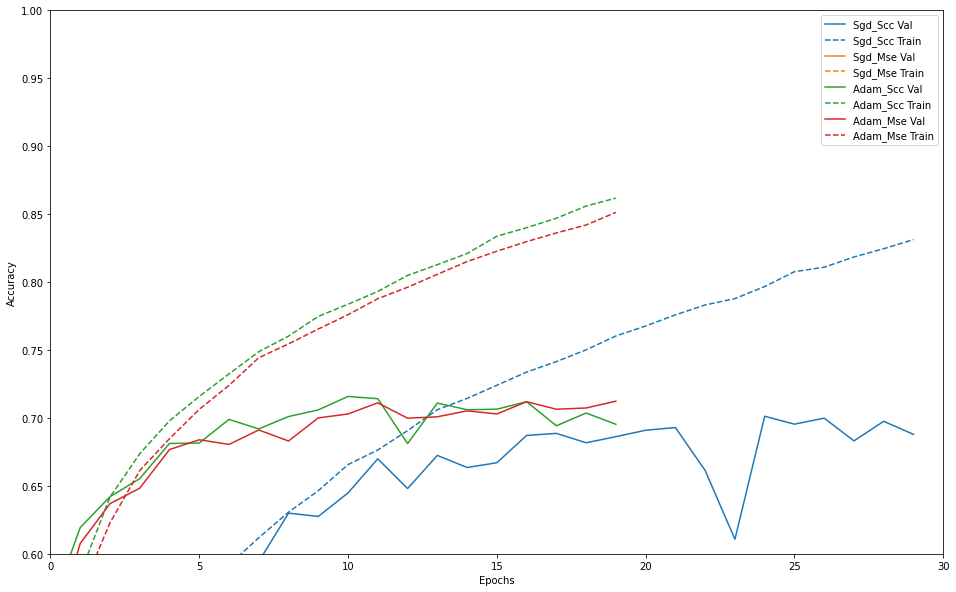

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                    label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], '--', color=val[0].get_color(), label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

#  plt.hlines([0.99], 0, 4, "blue", linestyles='dashed') 

#  plt.xlim([0,max(history.epoch)])
  plt.xlim([0,30])
  plt.ylim([0.6,1])

plot_history([('sgd_scc', sgd_scc),('sgd_mse', sgd_mse),('adam_scc', adam_scc),('adam_mse', adam_mse)])

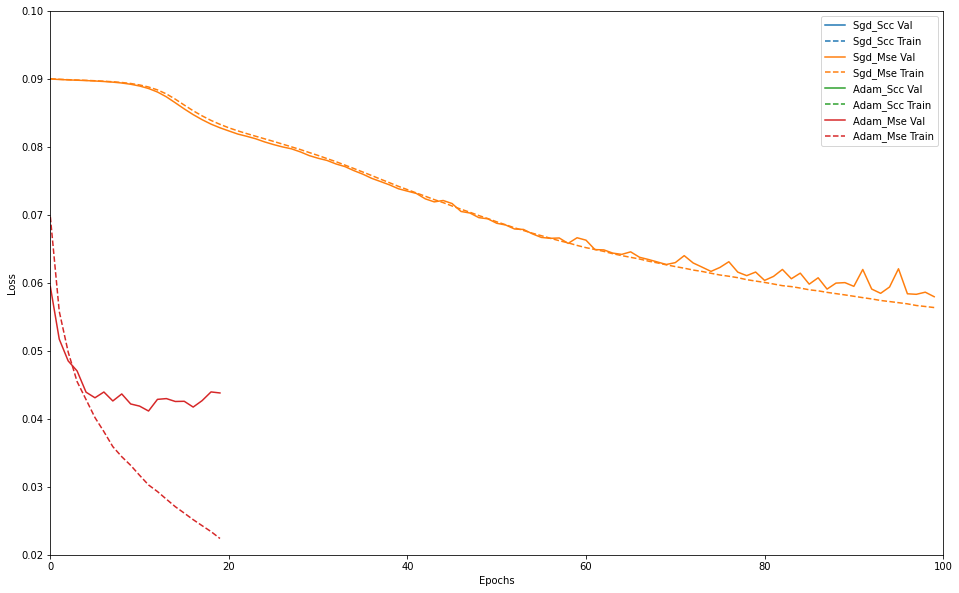

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories, key='loss'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], '--', color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

#  plt.hlines([0.99], 0, 4, "blue", linestyles='dashed') 

#  plt.xlim([0,max(history.epoch)])
  plt.xlim([0,100])
  plt.ylim([0.02,0.1])

plot_history([('sgd_scc', sgd_scc),('sgd_mse', sgd_mse),('adam_scc', adam_scc),('adam_mse', adam_mse)])